Model Accuracy: 0.99
Precision (Ham): 0.99
Recall (Ham): 1.00
F1 Score (Ham): 1.00
Precision (Spam): 1.00
Recall (Spam): 0.94
F1 Score (Spam): 0.97


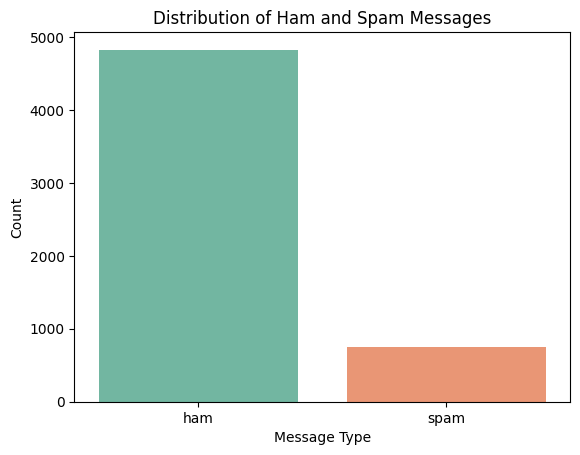

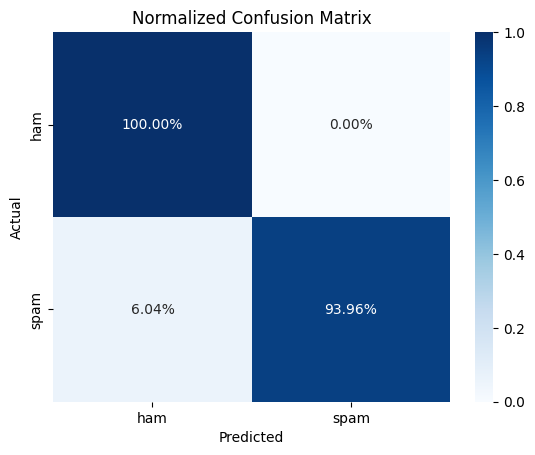

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("SMSSpamCollection (1).txt", sep='\t', header=None, names=['label', 'message'])

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

#using CountVectorizer converting text messages to numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#used Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)
y_pred = classifier.predict(X_test_vec)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None, labels=['ham', 'spam'])
recall = recall_score(y_test, y_pred, average=None, labels=['ham', 'spam'])
f1 = f1_score(y_test, y_pred, average=None, labels=['ham', 'spam'])
print(f"Model Accuracy: {accuracy:.2f}")
print(f"Precision (Ham): {precision[0]:.2f}")
print(f"Recall (Ham): {recall[0]:.2f}")
print(f"F1 Score (Ham): {f1[0]:.2f}")
print(f"Precision (Spam): {precision[1]:.2f}")
print(f"Recall (Spam): {recall[1]:.2f}")
print(f"F1 Score (Spam): {f1[1]:.2f}")


# To visualize distribution of Ham and Spam Messages
sns.countplot(x='label', hue='label', data=data, palette='Set2', legend=False)
plt.title('Distribution of Ham and Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

#To show the percentage of correct and incorrect predictions
conf_matrix_norm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Normalized Confusion Matrix')
plt.show()